In [3]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot


Text(0.5, 1.0, 'Ground Truth : 5')

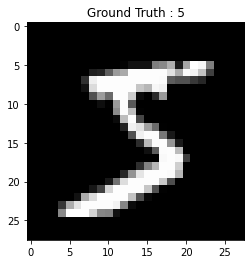

In [4]:
# GIVEN CODE
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

1. Adding hidden layers and changing activation type to ELU

In [5]:
# GIVEN CODE
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data = train_data /255.0
test_data = test_data /255.0
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential() # Initializing the model
model.add(Dense(64, activation='elu', input_shape=(dimData,))) # 1st hidden layer
model.add(Dense(128, activation='elu')) # 2nd hidden layer
model.add(Dense(256, activation='elu')) # 3rd hidden layer
model.add(Dense(512, activation='elu')) # 4th hidden layer
model.add(Dense(10, activation='softmax')) # output layer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # compile the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, # fitting the data
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.3987 - accuracy: 0.8754 - val_loss: 0.3980 - val_accuracy: 0.8719
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2049 - accuracy: 0.9373 - val_loss: 0.1917 - val_accuracy: 0.9367
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1447 - accuracy: 0.9550 - val_loss: 0.1604 - val_accuracy: 0.9525
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1146 - accuracy: 0.9644 - val_loss: 0.1146 - val_accuracy: 0.9640
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0953 - accuracy: 0.9697 - val_loss: 0.1444 - val_accuracy: 0.9568
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.1131 - val_accuracy: 0.9655
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0714 - accuracy: 0.9772 - val_loss: 0.0984 - val_accuracy: 0.9701

In [7]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot) # evaluating the model with the test loss and test accuarcy
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1302 - accuracy: 0.9768
Evaluation result on Test Data : Loss = 0.13015246391296387, accuracy = 0.9768000245094299


before adding and changing layers 

Loss = 1.769, accuracy = 0.420

after adding layers

Loss = 0.130, accuracy = 0.976

After modifying the layers, there has been a significant improvement in accuracy.

2. Plotting accuarcy and loss.

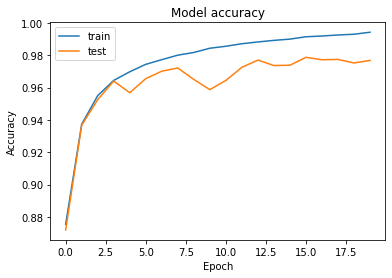

In [8]:
# plot the accurcy using history object
plt.plot(history.history['accuracy'])
# plot the val
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

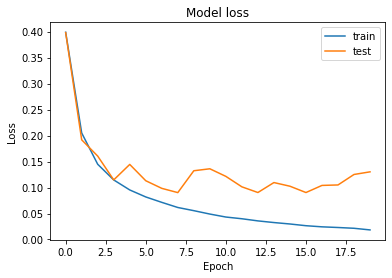

In [9]:
# plotting history for loss using history object
plt.plot(history.history['loss'])
# plot the val of loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

3. Running code without nomalization

In [10]:
# GIVEN CODE
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data 
#train_data = train_data /255.0  # commenting out the scale data lines to leave the unscaled.
#test_data = test_data /255.0
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [11]:
#creating network
model = Sequential() # initializing model
model.add(Dense(64, activation='elu', input_shape=(dimData,))) # 1st hidden layer
model.add(Dense(128, activation='elu')) # 2nd hidden layer
model.add(Dense(256, activation='elu')) # 3rd hidden layer
model.add(Dense(512, activation='elu')) # 4th hidden layer
model.add(Dense(10, activation='softmax')) # output layer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, # fitting the data
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 1.3302 - accuracy: 0.8068 - val_loss: 0.3621 - val_accuracy: 0.9000
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2480 - accuracy: 0.9326 - val_loss: 0.3098 - val_accuracy: 0.9158
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1638 - accuracy: 0.9529 - val_loss: 0.1594 - val_accuracy: 0.9555
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1242 - accuracy: 0.9645 - val_loss: 0.1630 - val_accuracy: 0.9579
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1016 - accuracy: 0.9719 - val_loss: 0.1866 - val_accuracy: 0.9556
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0870 - accuracy: 0.9751 - val_loss: 0.1880 - val_accuracy: 0.9626
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0796 - accuracy: 0.9775 - val_loss: 0.2088 - val_accuracy: 0.9600

In [12]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)  # evaluating the model with the test loss and test accuarcy
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.9557
Evaluation result on Test Data : Loss = 0.47247588634490967, accuracy = 0.9556999802589417


Minor change without unscaling the images

Loss = 0.472, accuracy = 0.955


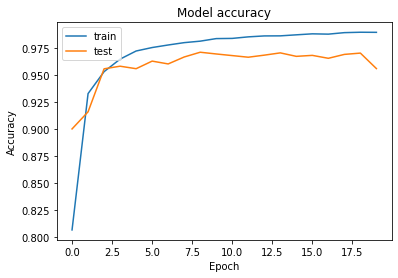

In [13]:
# plot the accurcy
plt.plot(history.history['accuracy'])
# plot the val
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

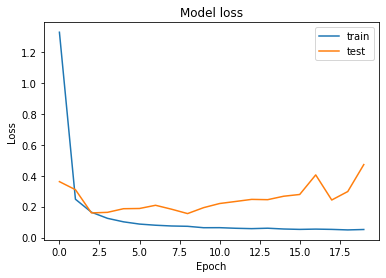

In [14]:
# plotting history for loss
plt.plot(history.history['loss'])
# plot the val of loss
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

4. Creating Functional API

In [15]:
# GIVEN CODE
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data = train_data /255.0
test_data = test_data /255.0
#change the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [16]:
#creating network
input_layer= Input(shape=(dimData,)) # input layer

hidden_layer=Dense(64, activation='elu')(input_layer) # 1st hidden layer
hidden_layer=Dense(128, activation='elu')(hidden_layer) # 2nd hidden layer
hidden_layer=Dense(256, activation='elu')(hidden_layer) # 3rd hidden layer
hidden_layer=Dense(512, activation='elu')(hidden_layer) # 4th hidden layer
output_layer=Dense(10, activation='softmax')(hidden_layer) # output layer

model = Model(inputs= input_layer, outputs=output_layer) # Initializing and creating the functional api model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, # fitting the model
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 5s 17ms/step - loss: 0.3952 - accuracy: 0.8773 - val_loss: 0.2833 - val_accuracy: 0.9145
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2042 - accuracy: 0.9375 - val_loss: 0.1824 - val_accuracy: 0.9457
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1470 - accuracy: 0.9546 - val_loss: 0.1534 - val_accuracy: 0.9531
Epoch 4/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1166 - accuracy: 0.9632 - val_loss: 0.1176 - val_accuracy: 0.9639
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0972 - accuracy: 0.9696 - val_loss: 0.1993 - val_accuracy: 0.9384
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0827 - accuracy: 0.9734 - val_loss: 0.1790 - val_accuracy: 0.9422
Epoch 7/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0709 - accuracy: 0.9767 - val_loss: 0.0969 - val_accuracy: 0.9715

In [17]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot) # evaluating the model with the test loss and test accuarcy
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9771
Evaluation result on Test Data : Loss = 0.11225304007530212, accuracy = 0.9771000146865845


Minor imporvement but does prove that the functional api is as good as the sequential model

5. Plotting one image and making a prediction

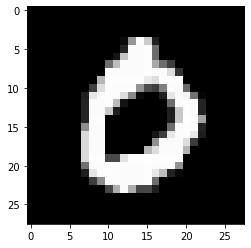

In [18]:
plt.imshow(test_images[3,:,:],cmap='gray') # selecting a random image

In [19]:
predict=model.predict(test_data[[3],:]) #using the model to predict what the image is
classes_predict=np.argmax(predict,axis=1) # classifying the image
print(classes_predict) #print the prediction

[0]


We tested this on most of the test images and it is predicting correctly as stated with the high accuracy given when we evaluated the model.

Bonus Questions

1. Change loss method to sparce categorical cross entropy

The error that we got was:

 "'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [256,10] and labels shape [2560]"

Since our target needs to be a 1D integer encoded target. in the given code we were changing the labels from interger to one hot encoding which was causing the problem. We replaced the code that was used for train_labels_one_hot and test_labels_one_hot with train_labels and test_labels


In [20]:
# GIVEN CODE
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data = train_data /255.0
test_data = test_data /255.0
#change the labels from integer to one-hot encoding

#commenting the one hot encoding lines to allow sparse categorical cross entropy to work.

#train_labels_one_hot = to_categorical(train_labels)
#test_labels_one_hot = to_categorical(test_labels)

In [21]:
#creating network
model = Sequential() # Initializing the model
model.add(Dense(64, activation='elu', input_shape=(dimData,))) # 1st hidden layer
model.add(Dense(128, activation='elu')) # 2nd hidden layer
model.add(Dense(256, activation='elu')) # 3rd hidden layer
model.add(Dense(512, activation='elu')) # 4th hidden layer
model.add(Dense(10, activation='softmax')) # output layer
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # compile the model
history = model.fit(train_data, train_labels, batch_size=256, epochs=20, verbose=1, # fitting the data
                   validation_data=(test_data, test_labels))

Epoch 1/20
235/235 [==============================] - 5s 16ms/step - loss: 0.3875 - accuracy: 0.8795 - val_loss: 0.2392 - val_accuracy: 0.9285
Epoch 2/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2020 - accuracy: 0.9376 - val_loss: 0.2021 - val_accuracy: 0.9348
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.1469 - accuracy: 0.9544 - val_loss: 0.2060 - val_accuracy: 0.9369
Epoch 4/20
235/235 [==============================] - 4s 15ms/step - loss: 0.1168 - accuracy: 0.9639 - val_loss: 0.1975 - val_accuracy: 0.9431
Epoch 5/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0970 - accuracy: 0.9693 - val_loss: 0.1234 - val_accuracy: 0.9639
Epoch 6/20
235/235 [==============================] - 4s 16ms/step - loss: 0.0823 - accuracy: 0.9738 - val_loss: 0.1365 - val_accuracy: 0.9611
Epoch 7/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0710 - accuracy: 0.9765 - val_loss: 0.1275 - val_accuracy: 0.9620

In [23]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels) # evaluating the model with the test loss and test accuarcy
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1385 - accuracy: 0.9753
Evaluation result on Test Data : Loss = 0.1385335773229599, accuracy = 0.9753000140190125


2. Print correct class from model prediction.

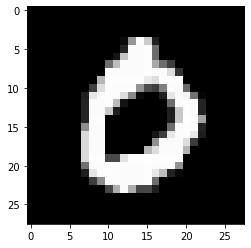

In [24]:
plt.imshow(test_images[3,:,:],cmap='gray') # selecting a random image

In [25]:
predict=model.predict(test_data[[3],:]) #using the model to predict what the image is
classes_predict=np.argmax(predict,axis=1) # classifying the image using numpy argmax
print(classes_predict) #print the prediction

[0]
